In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline
import math
import nltk
import string
from itertools import compress
from nltk import word_tokenize
import re
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

In [93]:
import stanza
stanza.download('es')
nlp = stanza.Pipeline(lang='es', processors='tokenize,mwt,pos,lemma,depparse')

2023-07-14 17:17:10 INFO: Downloading default packages for language: es (Spanish) ...
2023-07-14 17:17:12 INFO: File exists: C:\Users\Usuario\stanza_resources\es\default.zip
2023-07-14 17:17:16 INFO: Finished downloading models and saved to C:\Users\Usuario\stanza_resources.
2023-07-14 17:17:16 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2023-07-14 17:17:17 INFO: Loading these models for language: es (Spanish):
| Processor | Package |
-----------------------
| tokenize  | ancora  |
| mwt       | ancora  |
| pos       | ancora  |
| lemma     | ancora  |
| depparse  | ancora  |

2023-07-14 17:17:17 INFO: Use device: cpu
2023-07-14 17:17:17 INFO: Loading: tokenize
2023-07-14 17:17:17 INFO: Loading: mwt
2023-07-14 17:17:17 INFO: Loading: pos
2023-07-14 17:17:17 INFO: Loading: lemma
2023-07-14 17:17:17 INFO: Loading: depparse
2023-07-14 17:17:17 INFO: Done loading processors!


In [94]:
datos=pd.read_excel('Base de datos/Traducciones_Los_Lagos.xlsx')
datos

,Id,placeId,place name,Categoria query,Year,text,stars,Idioma,traduccion,nps
0,0,ChIJPRuUPTrRIZYRi41j8yCINJg,"""El Fogón""_ Pollo a las Brasas",restaurant,2023,"Excelente atención, venden pollos a las brasas...",5.0,es,"excelente atención, venden pollos a las brasas...",promotor
1,1,ChIJPRuUPTrRIZYRi41j8yCINJg,"""El Fogón""_ Pollo a las Brasas",restaurant,2022,Compramos 2 cuarto de pollo con papá\nY al po...,1.0,es,compramos 2 cuarto de pollo con papá\ny al po...,detractor
2,2,ChIJTwvoElmNIpYRXK-LlXEHBLc,13 Lunas Hostel,hotel,2023,Buena ubicación y los anfitriones super amable...,4.0,es,buena ubicación y los anfitriones super amable...,promotor
3,3,ChIJTwvoElmNIpYRXK-LlXEHBLc,13 Lunas Hostel,hotel,2023,Excelente atención 👏🏻,5.0,es,excelente atención 👏🏻,promotor
4,5,ChIJTwvoElmNIpYRXK-LlXEHBLc,13 Lunas Hostel,hotel,2023,Très bonne auberge avec dortoirs confortables ...,5.0,fr,muy buen albergue con dormitorios cómodos y li...,promotor
...,...,...,...,...,...,...,...,...,...,...
134550,278305,ChIJH4JP_-Tb9b0RzrxQFWoFaew,Reserva Nacional Lago Palena,national park,2021,Chaitén was formerly the capital of the Palena...,5.0,en,chaitén fue anteriormente la capital de la pro...,promotor
134551,278306,ChIJH4JP_-Tb9b0RzrxQFWoFaew,Reserva Nacional Lago Palena,national park,2018,"Maravilloso lugar!!, único, aún inexplorado, c...",5.0,es,"maravilloso lugar!!, único, aún inexplorado, c...",promotor
134552,278311,ChIJH4JP_-Tb9b0RzrxQFWoFaew,Reserva Nacional Lago Palena,national park,2016,súper lindo el lugar :):):),5.0,es,súper lindo el lugar :):):),promotor
134553,278314,ChIJ766vtHlhF5YRyzMnbS1Z0iU,Vicente Perez Rosales,national park,2023,"Demasiado precioso y bien conservado, increíbl...",5.0,es,"demasiado precioso y bien conservado, increíbl...",promotor


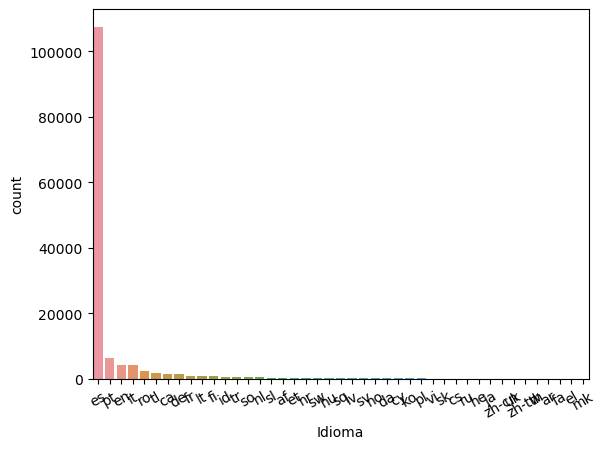

In [96]:
otros_idiomas=datos[datos["Idioma"]!='es']
g=sns.countplot(x=datos["Idioma"], order = datos["Idioma"].value_counts().index)
plt.xticks(rotation=30)
plt.show()

- 'pt': 'portuguese'
- 'en': 'english',
- 'it': 'italian',
- 'de': 'german',
- 'fr': 'french',

In [9]:
datos=datos[datos["Idioma"]=='es']

In [10]:
datos=datos[datos["nps"]=='promotor']

In [11]:
datos=datos[datos["Categoria query"].isin(['tourist atraction','national park','church'])]
datos

,Id,placeId,place name,Categoria query,Year,text,stars,Idioma,traduccion,nps
151,257,ChIJLTxz75CNIpYRWxjHYdRhlrc,Acceso a la Playa de Quincho Mutrico,national park,2023,Lugar específico para disfrutar de pesca con f...,4.0,es,lugar específico para disfrutar de pesca con f...,promotor
152,258,ChIJLTxz75CNIpYRWxjHYdRhlrc,Acceso a la Playa de Quincho Mutrico,national park,2023,Veo una vaca,5.0,es,veo una vaca,promotor
153,259,ChIJLTxz75CNIpYRWxjHYdRhlrc,Acceso a la Playa de Quincho Mutrico,national park,2022,Muy lindo y tranquilo lugar,5.0,es,muy lindo y tranquilo lugar,promotor
154,260,ChIJLTxz75CNIpYRWxjHYdRhlrc,Acceso a la Playa de Quincho Mutrico,national park,2022,El lugar muy bonito,4.0,es,el lugar muy bonito,promotor
156,262,ChIJLTxz75CNIpYRWxjHYdRhlrc,Acceso a la Playa de Quincho Mutrico,national park,2022,"Muy bonita vista, ideal para pescar.",5.0,es,"muy bonita vista, ideal para pescar.",promotor
...,...,...,...,...,...,...,...,...,...,...
134545,278290,ChIJvfJSUDOKF5YRZe9GgfAODLc,Portal Del Lago,national park,2018,Experiencia inolvidable!!,5.0,es,experiencia inolvidable!!,promotor
134546,278292,ChIJvfJSUDOKF5YRZe9GgfAODLc,Portal Del Lago,national park,2018,Hermosos paisajes y excelente camino,5.0,es,hermosos paisajes y excelente camino,promotor
134551,278306,ChIJH4JP_-Tb9b0RzrxQFWoFaew,Reserva Nacional Lago Palena,national park,2018,"Maravilloso lugar!!, único, aún inexplorado, c...",5.0,es,"maravilloso lugar!!, único, aún inexplorado, c...",promotor
134552,278311,ChIJH4JP_-Tb9b0RzrxQFWoFaew,Reserva Nacional Lago Palena,national park,2016,súper lindo el lugar :):):),5.0,es,súper lindo el lugar :):):),promotor


Se eliminan los ascentos

In [12]:
datos['traduccion']=datos['traduccion'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

Se pasa todo el texto a minuscula

In [13]:
datos['traduccion'] = datos['traduccion'].str.lower()

Se realiza un pre procesamiento donde se eliminan lo números, signos de puntuación, espacios al principio y al final de la frase y saltos de línea. También se reemplazan los espacios repetidos por un solo espacio.

In [14]:
datos['traduccion'] = datos['traduccion'].str.replace('\d+', '')
datos['traduccion'] = datos['traduccion'].str.translate(str.maketrans(' ', ' ', string.punctuation))
datos['traduccion'] = datos['traduccion'].str.strip()
datos['traduccion'] = datos['traduccion'].str.replace('\s+',' ')
datos['traduccion'] = datos['traduccion'].str.replace('\n',' ')

C:\Users\Usuario\AppData\Local\Temp\ipykernel_12028\3817179417.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  datos['traduccion'] = datos['traduccion'].str.replace('\d+', '')
C:\Users\Usuario\AppData\Local\Temp\ipykernel_12028\3817179417.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  datos['traduccion'] = datos['traduccion'].str.replace('\s+',' ')


In [15]:
datos['traduccion']

151       lugar especifico para disfrutar de pesca con f...
152                                            veo una vaca
153                             muy lindo y tranquilo lugar
154                                     el lugar muy bonito
156                      muy bonita vista ideal para pescar
                                ...                        
134545                              experiencia inolvidable
134546                 hermosos paisajes y excelente camino
134551    maravilloso lugar unico aun inexplorado con ve...
134552                                 super lindo el lugar
134553    demasiado precioso y bien conservado increible...
Name: traduccion, Length: 12659, dtype: object

In [16]:
def lemmatizer(text):  
  doc = nlp(text)
  return ' '.join([x.lemma for x in doc.sentences[0].words])

In [19]:
datos['lemmatized'] = datos['traduccion'].apply(lambda x: lemmatizer(x) if x else '')

In [23]:
datos

,Id,placeId,place name,Categoria query,Year,text,stars,Idioma,traduccion,nps,lemmatized
151,257,ChIJLTxz75CNIpYRWxjHYdRhlrc,Acceso a la Playa de Quincho Mutrico,national park,2023,Lugar específico para disfrutar de pesca con f...,4.0,es,lugar especifico para disfrutar de pesca con f...,promotor,lugar especifico para disfrutar de pesca con f...
152,258,ChIJLTxz75CNIpYRWxjHYdRhlrc,Acceso a la Playa de Quincho Mutrico,national park,2023,Veo una vaca,5.0,es,veo una vaca,promotor,ver uno vaca
153,259,ChIJLTxz75CNIpYRWxjHYdRhlrc,Acceso a la Playa de Quincho Mutrico,national park,2022,Muy lindo y tranquilo lugar,5.0,es,muy lindo y tranquilo lugar,promotor,mucho lindo y tranquilo lugar
154,260,ChIJLTxz75CNIpYRWxjHYdRhlrc,Acceso a la Playa de Quincho Mutrico,national park,2022,El lugar muy bonito,4.0,es,el lugar muy bonito,promotor,el lugar mucho bonito
156,262,ChIJLTxz75CNIpYRWxjHYdRhlrc,Acceso a la Playa de Quincho Mutrico,national park,2022,"Muy bonita vista, ideal para pescar.",5.0,es,muy bonita vista ideal para pescar,promotor,mucho bonito vista ideal para pescar
...,...,...,...,...,...,...,...,...,...,...,...
134545,278290,ChIJvfJSUDOKF5YRZe9GgfAODLc,Portal Del Lago,national park,2018,Experiencia inolvidable!!,5.0,es,experiencia inolvidable,promotor,experiencia inolvidable
134546,278292,ChIJvfJSUDOKF5YRZe9GgfAODLc,Portal Del Lago,national park,2018,Hermosos paisajes y excelente camino,5.0,es,hermosos paisajes y excelente camino,promotor,hermoso paisaje y excelente camino
134551,278306,ChIJH4JP_-Tb9b0RzrxQFWoFaew,Reserva Nacional Lago Palena,national park,2018,"Maravilloso lugar!!, único, aún inexplorado, c...",5.0,es,maravilloso lugar unico aun inexplorado con ve...,promotor,maravilloso lugar unico aun inexplorado con ve...
134552,278311,ChIJH4JP_-Tb9b0RzrxQFWoFaew,Reserva Nacional Lago Palena,national park,2016,súper lindo el lugar :):):),5.0,es,super lindo el lugar,promotor,super lindo el lugar


In [53]:
datos.to_csv('datos_lematizados.csv')

Se cargan las 'stopwords' del paquete nltk, para eliminarlas de los fundamentos